In [1]:
%matplotlib notebook
%pylab

Using matplotlib backend: nbAgg
Populating the interactive namespace from numpy and matplotlib


 Exact solution to the scalar advection equation
<hr style="border-width:4px; border-color:coral"></hr>

This notebook provides a function which solve the equation

\begin{equation}
q_t + cq_x = Q(x,t)
\end{equation}

on the domain $[a,b]\times[0,T]$.  The velocity $c$ is assumed to be constant. By Duhamel's Principle, the exact solution is given by 

\begin{equation}
u(x,t) = u(x-ct,0) + \int_0^t Q(x - c(t -\tau), \tau) \, d\tau
\end{equation}

We will use a quadrature rule to evaluate the convolution in the solution.  

The routine below solves the scalar advection equation for $N+1$ equally spaced points of $x \in [a,b]$.  The solution $q(x_i,t)$, $i = 0,1,2,\dots,N$ is returned in an array, along with an array $x$ containing the $x$ values.  

No... I am plotting the Heaviside function $\frac{1}{2} + \frac{1}{2} \mbox{erf}(x/\sqrt{4\varepsilon})$

In [2]:
# To get different figures, use the `figure()` command
# figure(1)
# clf()

x=np.linspace(-1,1,1001)
np.heaviside(x,0)
def delta_step(x):
    S=(heaviside(x+epsilon/2,1) - heaviside(x-epsilon/2,1))/epsilon
    return S
epsilon=0.05
S=delta_step(x)
# plt.plot(x,S)
# plt.grid()
# plt.show()

In [3]:
# figure(4)
# clf()

# Graphs for exercise 1
epsilon=0.05
x=linspace(-1,1,1001)
def Hat_funct(x):
    H=np.where(abs(x)<=(epsilon/2),(2/epsilon)*(1-abs((2*x))/epsilon),0)
    return H
H=Hat_funct(x)
# plt.plot(x,H, "b")


In [4]:
# figure(5)
# clf()
# Dirac delta
# Graphs for exercise 1
epsilon=0.05
x=linspace(-1,1,1001)
def Heatkernel(x):
    # COMMENT : This expression has a bug
#     Hk= (1/((4*np.pi*epsilon)**(0.5)))*exp(-x**2/(4*epsilon))
    Hk= (1/sqrt(4*np.pi*epsilon)*exp(-x**2/(4*epsilon)))
    return Hk

# COMMENT : You are calling your hat function again (:-))
# Hk=Hatfunct(x)
Hk = Heatkernel(x)

# plot(x,Hk, "b")
# 

<IPython.core.display.Javascript object>


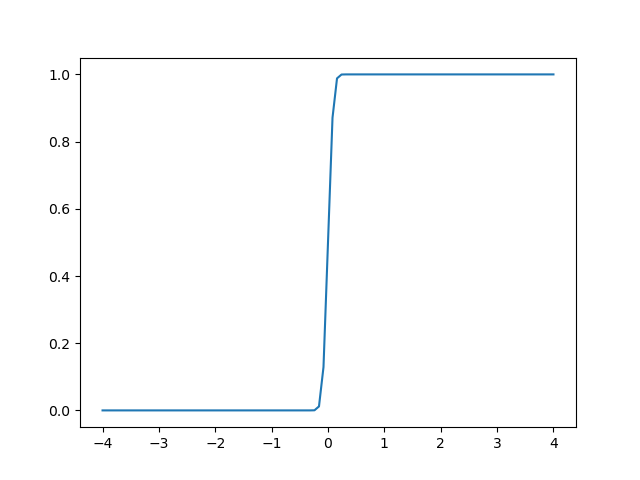

In [5]:
# Heaviside function
# from scipy import special
# import matplotlib.pyplot as plt
from scipy.special import erf
def heaviside_heat(x):
    return 1/2 + 1/2*erf((x)/((4*epsilon)*(0.5)))
x = np.linspace(-4,4,101)
plot(x, heaviside_heat(x))
# xlabel('x')
# ylabel('erf(x)')
# grid()
# show()

# plot of the Green’s function $G(x,t,\xi,\tau)$?

In [36]:
# figure(6)
# clf()


# Sample Heaviside function for the Step function

def Gfunct(x,t,si,tau):
    return Heatkernel(x-si-c*(t-tau))*heaviside_heat(t-tau)



# Domain0 [a,b]
a = 0
b = 1

# Velocity
c = 1

# Final time and space
T=2
L=4

# Number of mesh cells in x
N = 1001
x= linspace(a,b,N+1)
si= linspace(0,L,N+1)
# Number of time steps
M = 1001
t = linspace(a,b,M+1)
tau = linspace(0,T,M+1)

    
# Heaviside function (Step function)
# x = linspace(-1,1,101)
# H = heaviside_step(x,0.1)
for i in range(M+1):
    plot(x,Gfunct(x,t[i],si,tau), 'b.',label='Exact solution')
#legend()
#plt.show()
    


In [7]:
# a=1; b=-1; N=1001

from scipy.integrate import quad

def qinit_default(x):
    return zeros(x.shape)


def Q_default(x,t):
    return zeros(x.shape)

def adv_exact(a,b,t,N,init=qinit_default, Q=Q_default, c=1):
    
    xv = linspace(a,b,N+1)
    
    def f(tau):
        return Q(x-c*(t-tau), tau)
    
    qv = empty(xv.shape)
    for k,x in enumerate(xv):
        I = quad(f,0,t)
        qv[k] = init(x-c*t) + I[0]

    return qv,xv
    

## Sample problem

In this example, we solve the advection problem on the domain $[0,1]$. We start with initial conditions $q(x,0) = 0$ (the default initial conditions) and supply a steady source term 


\begin{equation}
Q(x,t) = e^{-100 (x-0.1)^2}
\end{equation}

near the left edge of the domain.   We solve the problem for a range of time values $t \in [0,T]$ and plot the solution.



In [15]:
# -----------------------------
# Problem parameters
#     -- Define Q(x,t) here
# -----------------------------

# Domain [a,b]
a = 0
b = 4

# Velocity
c = 1

# Final time 
# T = 0.1250
T=2

# def Q_src(x,t):
# #       return Heatkernel(x-0.3)*Heatkernel(t-0.1)
#        return Hat_funct(x-0.3)*Hat_funct(t-0.1)
# #       return delta_step(x-0.3)*delta_step(t-0.1)

def Q_src2(x,t):
    return Heatkernel(x-0.3)*Heatkernel(t-0.1)

# def Q_src3(x,t):
#     return delta_step(x-0.3)*delta_step(t-0.1)

    # return sin(2*pi*t)*exp(-100*(x-0.1)**2)
#     return exp(-100*(x-0.1)**2)
 

# -----------------------------
# Numerical parameters
# -----------------------------

# Number of mesh cells in x
N = 1001

# Number of time steps
M = 16
tv = linspace(0,T,M+1)

# -----------------------------
# Solution
# -----------------------------

# qmat = empty((M+1,N+1))
qmat2 = empty((M+1,N+1))
# qmat3 = empty((M+1,N+1))
for k in range(M+1):
#     qmat[k],x, = adv_exact(a,b,tv[k],N,Q = Q_src, c=c)
    qmat2[k],x, = adv_exact(a,b,tv[k],N,Q = Q_src2, c=c)
#     qmat3[k],x, = adv_exact(a,b,tv[k],N,Q = Q_src3, c=c)


### Plot

Below, we plot the solution over the range of times computed above. 

In [28]:
fig = figure(1)
clf()

# hdl, = plot(x,qmat[0],'r')
hdl2, = plot(x,qmat2[0],'b')
# hdl3, = plot(x,qmat3[0],'g')



t = tv[0]
tstr = 'Scalar advection : t = {:.4f}'.format
htitle = title(tstr(0))

xlabel('x')
ylabel('q(x,t)')
htitle.set_text(tstr(t))

grid(axis='y')


for m in range(M+1):
#     hdl.set_ydata(qmat[m])
    hdl2.set_ydata(qmat2[m])
#     hdl3.set_ydata(qmat3[m])
#     plot(x,qmat[m],'r')
    ylim([0,0.75])
    
    t = tv[m]
    htitle.set_text(tstr(t))
    
    fig.canvas.draw()
    pause(0.2)
 
    legend(['Kernel'])

show()

<IPython.core.display.Javascript object>

NameError: name 'qmat2' is not defined

In [ ]:
def Q_source(x,t):
    return Heatkernel(x-si-c*(t-tau))*heaviside_heat(t-tau)


